In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Histogram, PDF and CDF

The **histogram** of an image represents the distribution of pixel intensity values. It counts how many pixels in the image have a given brightness level (0–255 for 8-bit images).

---

### Probability Density Function (PDF)

The **Probability Density Function (PDF)** of image intensities describes the *relative frequency* of each gray level.  
If \( r_k \) denotes the \( k^{th} \) gray level (intensity value) and \( n_k \) is the number of pixels having that intensity, then:

$
p(r_k) = \frac{n_k}{N}
$

where  
- \( N \) = total number of pixels in the image.  
- \( p(r_k) \) represents the normalized probability of the \( k^{th} \) intensity.

The normalization ensures:

$
\sum_{k=0}^{L-1} p(r_k) = 1
$

(\( L \) is the number of gray levels, typically 256.)

---

### Cumulative Distribution Function (CDF)

The **Cumulative Distribution Function (CDF)** accumulates the probabilities up to a given level \( r_k \):

$
c(r_k) = \sum_{j=0}^{k} p(r_j)
$

This means \( c(r_k) \) gives the probability that a pixel has an intensity **less than or equal to** \( r_k \).

The CDF increases monotonically from 0 to 1, providing a smooth representation of the brightness distribution.

---

### Intuitive View

- The **PDF** shows *how frequently each brightness value occurs* (shape of the histogram).  
- The **CDF** shows *how these frequencies accumulate*, which is particularly useful in **histogram equalization**.



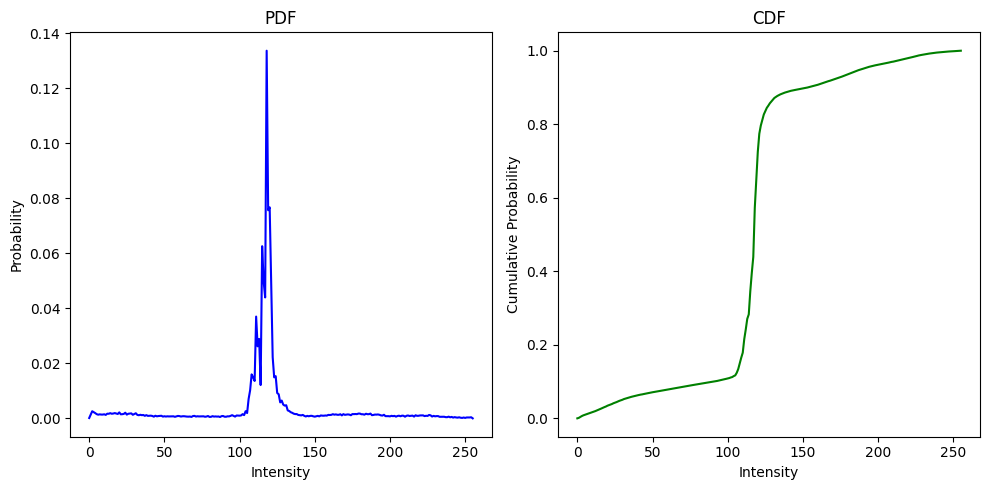

In [27]:
img = cv2.imread('images.jfif')    
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Compute PDF (Histogram normalized)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
pdf = hist / hist.sum()

# Compute CDF (Cumulative Distribution Function)
cdf = pdf.cumsum()
cdf_normalized = cdf / cdf.max()  # normalize to [0,1] range for plotting ()
#Because the final value of the CDF is not exactly equal to 1 (it may slightly differ)

# # Plot PDF and CDF
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(pdf, color='blue')
plt.title('PDF')
plt.xlabel('Intensity')
plt.ylabel('Probability')

plt.subplot(1,2,2)
plt.plot(cdf_normalized, color='green')
plt.title('CDF')
plt.xlabel('Intensity')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

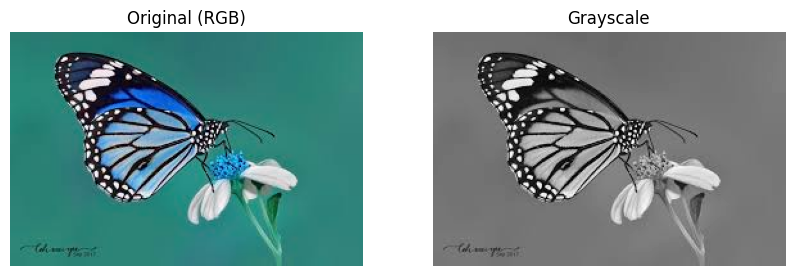

In [16]:

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original (RGB)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.show()


##  Contrast Stretching (Intensity Range Expansion)

In this exercise, the goal is to **stretch the contrast of the grayscale image**
so that the full available brightness range is used.
This is done by linearly mapping the actual intensity range  
\([I_{min}, I_{max}]\) of the input image  
to the display range \([0, 255]\).

###  Formula
$$
I_{\text{stretched}}(x, y) =
\frac{I(x, y) - I_{\min}}{I_{\max} - I_{\min}} \times 255
$$



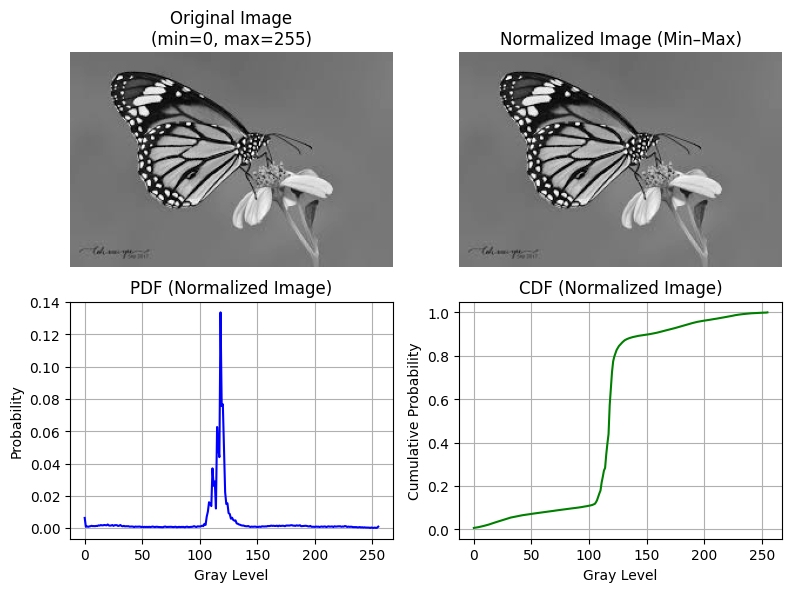

Original intensity range : [0, 255]
Normalized intensity range: [0, 255]


In [19]:
img = cv2.imread('images.jfif', cv2.IMREAD_GRAYSCALE)
I_min, I_max = np.min(img), np.max(img)
norm_img = ((img - I_min) / (I_max - I_min)) * 255
norm_img = norm_img.astype(np.uint8)

# norm_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Compute histograms, PDF, and CDF for the normalized image
hist = cv2.calcHist([norm_img], [0], None, [256], [0, 256])
pdf = hist / hist.sum()
cdf = np.cumsum(pdf)
cdf_norm = cdf / cdf.max()

# Display results
plt.figure(figsize=(12, 6))

# (a) Original vs Normalized comparison
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title(f'Original Image\n(min={I_min}, max={I_max})')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(norm_img, cmap='gray')
plt.title('Normalized Image (Min–Max)')
plt.axis('off')

# (b) PDF comparison
plt.subplot(2, 3, 4)
plt.plot(pdf, color='blue')
plt.title('PDF (Normalized Image)')
plt.xlabel('Gray Level')
plt.ylabel('Probability')
plt.grid(True)

# (c) CDF comparison
plt.subplot(2, 3, 5)
plt.plot(cdf_norm, color='green')
plt.title('CDF (Normalized Image)')
plt.xlabel('Gray Level')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print useful stats for verification
print(f"Original intensity range : [{I_min}, {I_max}]")
print(f"Normalized intensity range: [{norm_img.min()}, {norm_img.max()}]")

## Histogram Clipping

Histogram Clipping linearly remaps pixel intensities from a **fixed input range** $[f_{\text{low}},\, f_{\text{max\_input}}]$ to the **output range** $[M_{TL},\, M_{TN}]$ (usually [0, 255]).  
This enhances contrast by expanding or compressing gray‑level values within chosen limits.

If $f(x,y)$ denotes the original pixel intensity, the clipped pixel value is computed as:

$$
\text{clip}(f(x,y)) =
\left(
\frac{f(x,y) - f_{\text{low}}}{f_{\text{max\_input}} - f_{\text{low}}}
\right)
\times (M_{TN} - M_{TL}) + M_{TL}
$$

### Parameter Definitions
$
\begin{aligned}
f_{\text{low}} &: \text{lower intensity bound of the input range (e.g. 100)} \\
f_{\text{max\_input}} &: \text{upper intensity bound of the input range (e.g. 130)} \\
M_{TL} &: \text{minimum level of the output range (often 0)} \\
M_{TN} &: \text{maximum level of the output range (often 255)}
\end{aligned}
$

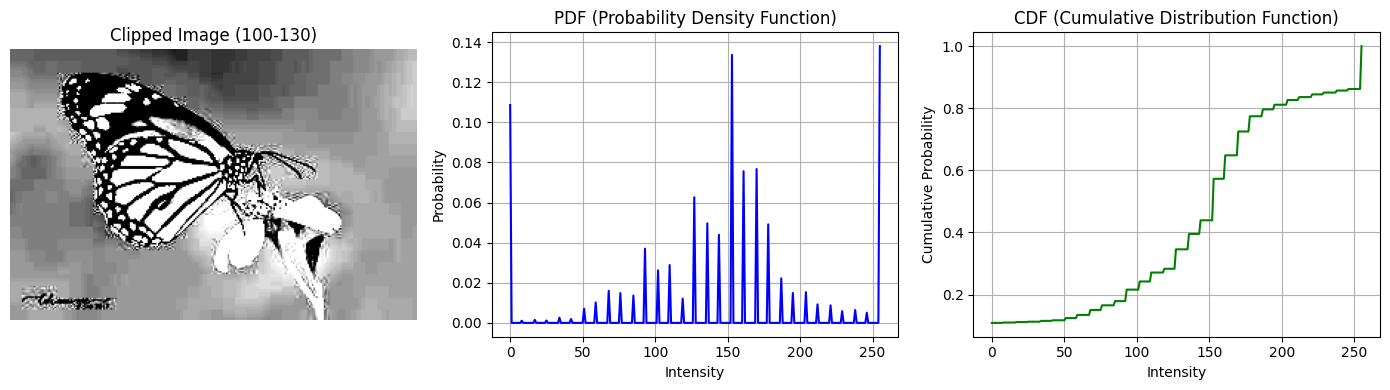

In [22]:
f_low, f_max_input = 100, 130
MIN_OUT, MAX_OUT = 0, 255

img_float = img.astype('float32')

clipped_img = ((img_float - f_low) / (f_max_input - f_low)) * (MAX_OUT - MIN_OUT) + MIN_OUT
clipped_img = np.clip(clipped_img, 0, 255)
clipped_img = clipped_img.astype('uint8')
pdf = hist / hist.sum()        
cdf = np.cumsum(pdf)          
cdf_norm = cdf / cdf.max()    

#show
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.imshow(clipped_img, cmap='gray')
plt.title(f'Clipped Image ({f_low}-{f_max_input})')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(pdf, color='blue')
plt.title('PDF (Probability Density Function)')
plt.xlabel('Intensity'); plt.ylabel('Probability'); plt.grid(True)

plt.subplot(1,3,3)
plt.plot(cdf_norm, color='green')
plt.title('CDF (Cumulative Distribution Function)')
plt.xlabel('Intensity'); plt.ylabel('Cumulative Probability'); plt.grid(True)

plt.tight_layout()
plt.show()

## Histogram Equalization

Histogram Equalization redistributes pixel intensities so that the output image has a **more uniform histogram**.  
It is one of the most common techniques for **contrast enhancement** in digital image processing.

If $f(x,y)$ represents the intensity of a pixel in the original image, histogram equalization applies a cumulative transformation defined by its **CDF** (cumulative distribution function):

$$
f_{\text{equalized}}(x,y) = (L - 1) \times CDF(f(x,y))
$$

where:

$
\begin{aligned}
L &: \text{number of possible gray levels (usually 256)} \\
CDF(f(x,y)) &: \text{normalized cumulative sum of the intensity probabilities up to } f(x,y)
\end{aligned}
$

This transformation ensures that the gray levels are **spread over the entire range [0, 255]**, making the image’s brightness and contrast more balanced.

---

### Visual Effect
- **Before Equalization:** Histogram is concentrated in a narrow intensity range → low contrast.  
- **After Equalization:** Histogram becomes approximately uniform → details in dark and bright regions become more visible.

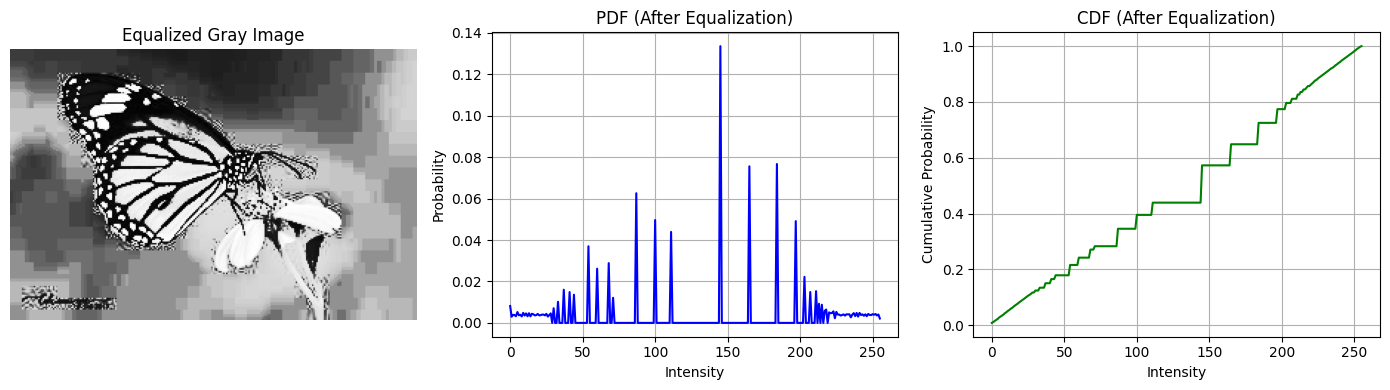

In [24]:
equalized_img = cv2.equalizeHist(img)

hist = cv2.calcHist([equalized_img], [0], None, [256], [0,256])
pdf = hist / hist.sum()
cdf = np.cumsum(pdf)
cdf_norm = cdf / cdf.max() 

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Gray Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(pdf, color='blue')
plt.title('PDF (After Equalization)')
plt.xlabel('Intensity'); plt.ylabel('Probability'); plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(cdf_norm, color='green')
plt.title('CDF (After Equalization)')
plt.xlabel('Intensity'); plt.ylabel('Cumulative Probability'); plt.grid(True)

plt.tight_layout()
plt.show()